# Wastewater Treatment (WWT)

In [1]:
import PFAS_SAT_ProcessModels as pspd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document
The WWT process models in the SAT framework are designed so that by changing default parameters, a variety of WWT technology components and configurations can be represented. A relatively small amount of the incoming PFAS may be released in initial screen rejects and grit. Volatilization is another potential pathway, and its importance is currently poorly understood. Most PFAS entering conventional WWTPs will exit in the effluent or with the solids. In an increasing number of cases, some fraction of the PFAS are removed in tertiary treatment through reverse osmosis (RO), ion exchange (IX) or granular activated carbon (GAC) adsorption systems prior to release. These systems then produce new waste streams (i.e., RO concentrate and spent GAC, respectively) that must be managed.

The mass flow of PFAS through the WWT processes is modeled using a water and mass balance through the system. The incoming PFAS-waste is diluted with the rest of the influent wastewater. When PFAS is partitioned between liquids and solids, it is assumed that equilibrium is achieved. The model does not consider transformations of PFAS. A relatively small fraction of the influent water leaves in the screen rejects and grit. The water lost with the material is assumed to have the same PFAS concentration as the influent. The remainder of the water and PFAS enters primary settling (if the WWTP has primary settling), and a fraction of the water at the influent PFAS concentration is again lost. The rest of the PFAS-containing water enters biological treatment, where PFAS partitions between the solids and liquid based on the organic carbon-normalized partition coefficient for each PFAS. The effluent from biological treatment enters secondary settling, which acts in a similar manner to primary settling. The effluent from secondary settling can then either be released to surface water or continue to tertiary treatment. The primary and secondary solids can then be thickened, dewatered, dried, stabilized, anaerobically digested or composted. The effluent can be treated through tertiary treatment processes designed to remove PFAS, such as GAC, RO, or IX.

<img src="../Images/ProcessModels/WWTP.png" alt="Drawing" style="width: 700px;"/>


<img src="../Images/ProcessModels/WWT_Settling_Solids_Diagram_v3.png" alt="Drawing" style="width: 700px;"/>



### Assumptions and Limitations

1.	The model assumes that liquids lost in screen rejects, grit, and settled solids have the same PFAS concentrations as the liquid entering the process.
2.	Volatilization is assumed to be zero. However, the user may assign a fraction of the PFAS that volatilizes/aerosolizes.
3.	Future work and additional data are required to include PFAS transformations during WWT processes. 


## Input Parameters for WWT model

In [2]:
WWT = pspd.WWT()
WWT.InputData.Data[['Category','Parameter Name', 'Parameter Description', 'amount', 'unit','minimum','maximum','Reference']]

,Category,Parameter Name,Parameter Description,amount,unit,minimum,maximum,Reference
0,WWT Plant,Des_Cap,Design capacity of the WWT plant,7.6000,Million Liter/day,3.00,300.000,
1,Screen Rejects,frac_sr-grit,Mass fraction influent into screen rejects and grit,0.0001,fraction,NaN,NaN,
2,Screen Rejects,sol_cont_sr_grit,Solids content of the screen rejects and grit,0.6500,fraction,0.50,0.900,[1]
3,Primary Settling,is_prim_set,Is there primary settling,1.0000,"1:TRUE,0:FALSE",NaN,NaN,
4,Primary Settling,frac_prim_solids,Mass fraction influent into settling that exits in the solids,0.0040,fraction,NaN,NaN,[1]
5,Primary Settling,sol_cont_prim_solids,Solids content of primary solids - wet,0.0600,fraction,0.04,0.080,[1]
6,Biological Treatmet,sol_cont,Mixed liquor suspended solids (MLSS),3000.0000,mg/L,2000.00,4000.000,[1]
7,Biological Treatmet,C_cont,Carbon content of the MLSS,0.5000,kg TS/kg,NaN,NaN,
8,Biological Treatmet,VS_cont,VS content of the MLSS - dry,0.8000,kg VSS/kg TS,NaN,NaN,
9,Thickening,is_prim_thick,Does primary sludge go to thickening,1.0000,"1:TRUE,0:FALSE",NaN,NaN,


## Incoming Landfill Leachte to WWT

In [3]:
IncomingWaste = pspd.IncomFlow()
IncomingWaste.set_flow('LFLeachate', 1000)
IncomingWaste.calc()
LFLeachate = IncomingWaste.Inc_flow
LFLeachate.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,10.0
2,Moisture flow,kg,990.0
3,Volume flow,L,1000.0
4,Carbon flow,kg,5.0
5,PFOA,μg,5700.0
6,PFOS,μg,90.0
7,PFBA,μg,750.0
8,PFPeA,μg,680.0
9,PFHxA,μg,1650.0


## PFAS balance in WWT

In [4]:
WWT.calc(Inc_flow=LFLeachate)
WWT.report(normalized=True)

,Volatilized,DryerExhaust,WWT Effluent,solids,Screen Rejects
PFOA,0.0,0.0,80.21,19.78,0.01
PFOS,0.0,0.0,37.37,62.62,0.01
PFBA,0.0,0.0,88.74,11.25,0.01
PFPeA,0.0,0.0,95.48,4.51,0.01
PFHxA,0.0,0.0,90.82,9.17,0.01
PFHpA,0.0,0.0,86.70,13.29,0.01
PFNA,0.0,0.0,60.27,39.72,0.01
PFDA,0.0,0.0,27.40,72.59,0.01
PFBS,0.0,0.0,94.26,5.73,0.01
PFHxS,0.0,0.0,51.35,48.64,0.01


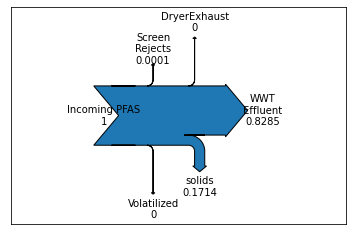

In [5]:
WWT.plot_sankey()

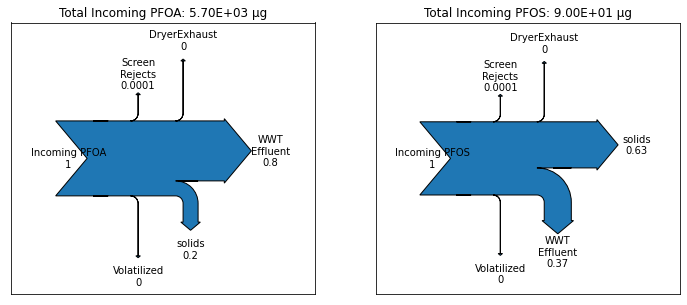

In [6]:
WWT.plot_sankey_report(margin=.6, gap=.6)

In [7]:
A=WWT.products()['WWTEffluent']

## Effluent and solids mass flows

In [8]:
products = WWT.products()
print( """
Effluent volume (Liter) : {}
Screen Rejects mass (kg): {}
RawWWTSoilds mass (kg): {}
DewateredWWTSolids mass (kg): {}
DeriedWWTSolids mass (kg): {}
""".format(products['WWTEffluent'].vol,
           products['WWTScreenRejects'].mass,
           products['RawWWTSolids'].mass,
           products['DewateredWWTSolids'].mass,
           products['DriedWWTSolids'].mass))        


Effluent volume (Liter) : 988.4007936272117
Screen Rejects mass (kg): 0.2857142857142857
RawWWTSoilds mass (kg): 0.0
DewateredWWTSolids mass (kg): 0
DeriedWWTSolids mass (kg): 3.6033275744680844



## Sensitivity to the Mixed liquor suspended solids (MLSS)  (Default: 1000 mg/L)

Text(0, 0.5, 'Percent of Incoming PFAS that \n remains in the Effluent (%)')

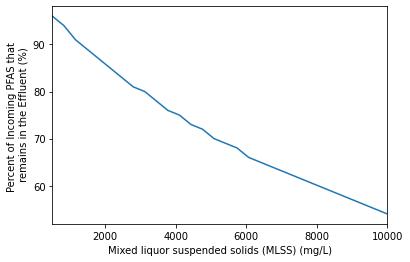

In [9]:
MLSS = np.linspace(500,10000,30)
PFAS_inEffluent = []
IncomingWaste.set_flow('LFLeachate', 1000)
IncomingWaste.calc()
for i in MLSS:
    WWT.InputData.BioTrtmnt['sol_cont']['amount'] = i
    WWT.calc(IncomingWaste.Inc_flow)
    PFAS_inEffluent.append(round(WWT.report(normalized=True)['WWT Effluent']['PFOA']))
plt.plot(MLSS,PFAS_inEffluent)
plt.xlim(500,10000)
plt.xlabel('Mixed liquor suspended solids (MLSS) (mg/L)')
plt.ylabel('Percent of Incoming PFAS that \n remains in the Effluent (%)')